## 1. Fundamental
DT is a type of supervised learning algorithm that is mostly used for classification problems. Surprisingly, it **works for both categorical and continuous dependent** variables. In this algorithm, we **split the population into two or more homogeneous sets**. This is done based on most significant attributes/independent variables to make as distinct groups as possible.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/IkBzK.png)

In the image above, you can see that population is classified into four different groups based on multiple attributes to identify ‘if they will play or not’. To split the population into different heterogeneous groups, it uses various techniques like Gini, Information Gain, Chi-square, entropy.

The best way to understand how decision tree works, is to play Jezzball – a classic game from Microsoft (image below). Essentially, you have a room with moving walls and you need to create walls such that maximum area gets cleared off with out the balls.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/08/download.jpg)

So, every time you split the room with a wall, you are trying to create 2 different populations with in the same room. Decision trees work in very similar fashion by dividing a population in as different groups as possible.

More: [Simplified Version of Decision Tree Algorithms](https://www.analyticsvidhya.com/blog/2015/01/decision-tree-simplified/)

## 2. Example
**Code with Iris dataset**

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# module
from sklearn import tree
# evaluation
from sklearn.metrics import confusion_matrix

### 2.1 Load the dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
# dataset description
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
# dataframe view
iris_df = pd.DataFrame(
    data=np.append(iris.data, iris.target.reshape(-1, 1), axis=1), 
    columns=np.append(iris.feature_names,['class'])
)
iris_df['class'] = iris_df['class']\
                             .map({
                                    0: iris.target_names[0], 
                                    1: iris.target_names[1],
                                    2: iris.target_names[2]
                                  })
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### 2.2 Build model

In [5]:
# Initialize and train model
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(iris.data, iris.target)

### 2.3 Confusion matrix

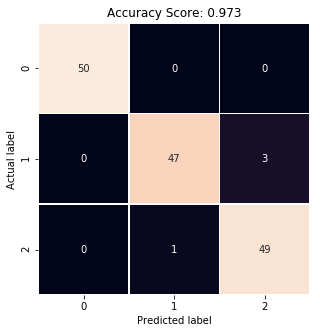

In [6]:
# calculate confusion matrices
prediction = clf.predict(iris.data)
cm = confusion_matrix(y_true=iris.target, y_pred=prediction)
acc = clf.score(X=iris.data, y=iris.target)
# visualization with seaborn
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='.0f', linewidths=.5, square = True, cbar=False);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: %.3f'%(acc)
plt.title(all_sample_title, size = 12);

### 2.4 Tree inference & visualization
This part require graphviz libraries

See this [link](https://askubuntu.com/questions/917030/how-to-install-pydot-and-graphviz) for installation

        sudo apt install python-pydot python-pydot-ng graphviz

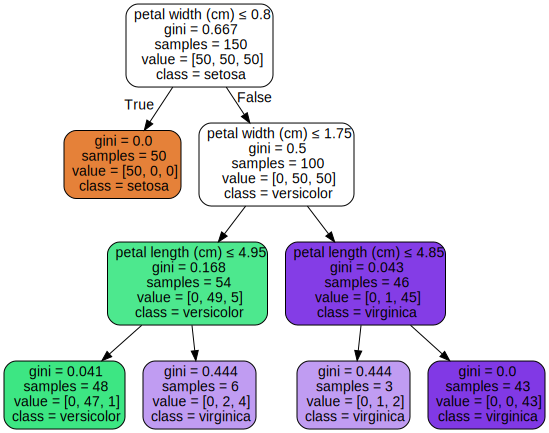

In [7]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graphviz.Source(dot_data)

### 2.5 Additional materials
#### Decision surface

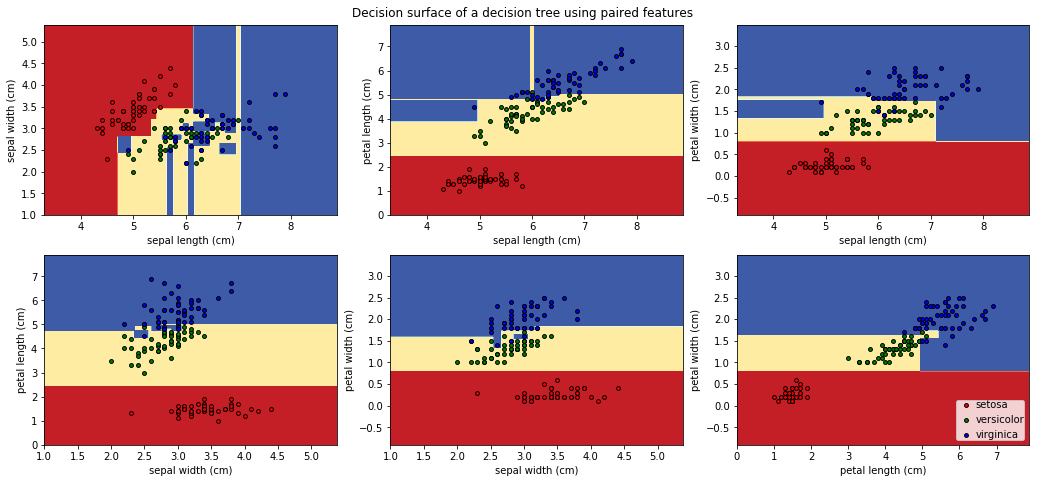

In [8]:
# Plot the decision surface of a decision tree on the iris dataset
# Parameters
n_classes = 3
plot_colors = "rgb"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=(15,7))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

#### Decision tree as regression model

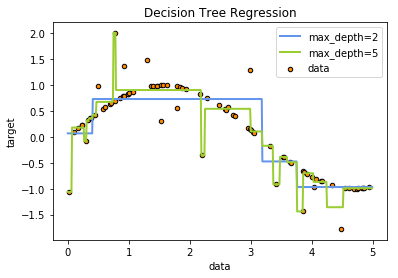

In [9]:
# Optional: Regression Decission Tree
# https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
# print(__doc__)

# Create a random dataset
rng = np.random.RandomState(42)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

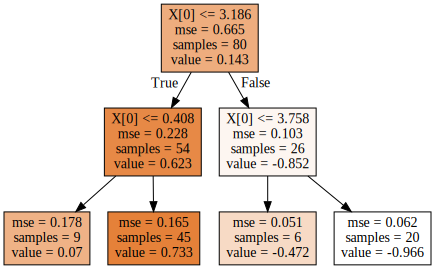

In [10]:
tree1_dot = tree.export_graphviz(regr_1, out_file=None, filled=True)  
graphviz.Source(tree1_dot)

#### Multi-output Decision Tree Regression

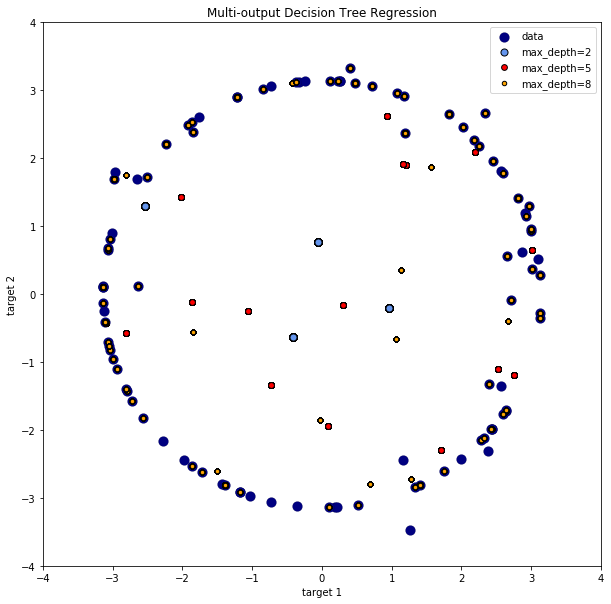

In [11]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_3 = tree.DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure(figsize=(10,10))
s = 100
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="data", linewidths=0.1)
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s/2, edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s/3, edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s/5, edgecolor="black", label="max_depth=8")
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()